In [9]:
# plot results_encoding_analysis
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(1, 'functions/')
from importlib import  reload
import utility; reload(utility)
from utility import Figsize_scale
font_ssmall = 15
font_small = 20
font_medium = 30
font_big = 40





def get_colors_cmap(cmap, n):
    import matplotlib.pyplot as plt
    import matplotlib
    cmap = plt.get_cmap(cmap, n)
    colors = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    return colors


def barplot_wi_colors(wi,ax,  idx_cat = None,  n_spks = 12, n_speed = 2, cmap ='tab20', ylim = None):

    n = n_spks + n_speed
    M = (len(wi)-n_speed)/n_spks
    # generate colors according to colormap
    colors = get_colors_cmap(cmap, n)
    # fig, ax = plt.subplots(figsize = figsize)
    for j in range(n_spks):
        ds = np.arange(j*M, (j+1)*M)
        wij = wi[int(j*M): int((j+1)*M)]
        if idx_cat is None:
            idx = j+1
        else:
            idx = idx_cat[j]+1
        ax.bar(ds, wij, color = colors[j],label ='spk'+str(idx)); 

    wij = wi[-n_speed:]
    ds = np.arange((j+1)*M, (j+1)*M+n_speed)
    ax.bar(ds, wij, color = colors[n_spks],label ='speed');
    if ylim is not None:
        ax.set_ylim(ylim)
    # ax.legend(fontsize = 5)



def plt_yfit(y,y_fit, scores,plot_type ='example', figsize = (10, 15), savepath = None):
    if plot_type =='example':
        n = 5
    elif plot_type =='full':
        n = y_fit.shape[1]
    fig,ax = plt.subplots(n,1,figsize = figsize)

    for i in range(len(ax)):
        ax[i].plot(y[i,:], 'k', label='x', alpha =0.8, )
        ax[i].plot(y_fit[:,i],'r',label ='x_predict',alpha =0.8,)
        ax[i].set_title('Score:'+str(np.round(scores[i],2)), fontsize =font_small )
        # ax[i].set_ylabel('Intensity')
    # ax[0].legend(bbox_to_anchor=(1.15, 1.4) )
    lines, labels = ax[0].get_legend_handles_labels()
    lgd = fig.legend(lines, labels, bbox_to_anchor=(1, 0.98) )

    ax[-1].set_xlabel('Cliped time (Frame) ')
    st = fig.suptitle('Regression Results')
    fig.tight_layout()
    if savepath is not None:
        figname = 'y_fit_'+plot_type+'.pdf'
        savefig = os.path.join(savepath, figname)
        fig.savefig(savefig,bbox_extra_artists=(lgd,st),bbox_inches='tight')
        plt.show()


        
def barplot_weights(ws, name =None, plot_type ='example',
                    n_spks = 12, n_speed = 2,
                    figsize = (10, 15), ylim = None, include_legend =True,
                     bbox_to_anchor = (1.15, 0.9) ,
                     ax_title_fontsize = 20,xlabel_fontsize = 20, 
                     legend_fontsize = 20,    
                     savepath = None,idx_cat = None):
    """
    bar plot weights
    """

    n = n_spks + n_speed
    M = (ws.shape[1]-n_speed)/n_spks

    nef = ws.shape[0]
    if plot_type =='example':
        n = 5
    elif plot_type =='full':
        n = nef

    if name is None:
        name ='regression_weights'
    
    fig,ax = plt.subplots(n, 1, figsize = figsize )

    for i in range(len(ax)):
        wi = ws[i,:]
        barplot_wi_colors(wi, ax[i], n_spks =n_spks, n_speed = n_speed,
                          idx_cat = idx_cat, ylim = ylim )
        # ax[i].set_ylabel('Weight')
        ax[i].set_title(r"$x_{%d}$" %i, fontsize =ax_title_fontsize )
        ax[i].set_xticks([])
        
    xticks = [n_spks*M*0.25,n_spks*M*0.5, n_spks*M*0.75, ws.shape[1]-1 ]
    xticklabels =['spk_left','','spk_right','speed']
    ax[-1].set_xticks(xticks)
    ax[-1].set_xticklabels(xticklabels, rotation = 30, fontsize = xlabel_fontsize)

    lines, labels = ax[0].get_legend_handles_labels()
    lgd = fig.legend(lines, labels, bbox_to_anchor= bbox_to_anchor,fontsize = legend_fontsize,)
    # fig.subplots_adjust(top=0.93)
    st=fig.suptitle(name.replace('_',' '))
    fig.tight_layout()

    if savepath is not None:
        figname = name + '_' + plot_type+'.pdf'
        savefig = os.path.join(savepath, figname)
        if include_legend:
            fig.savefig(savefig, bbox_extra_artists=(lgd,st),bbox_inches='tight')
        else:
            fig.savefig(savefig, bbox_extra_artists=(st,),bbox_inches='tight')
    plt.show()

def barplot_score_cat(relative_contribution_scores, cmap = 'tab20', savepath = None,
                    name = 'Relative_contribution', plot_type = 'full',
                    include_legend = True, ylim = [0,1],figsize = (10,8),n_spks = 12):
    nef, nstims= relative_contribution_scores.shape
    fig,ax = plt.subplots(nef, 1, figsize = figsize)
    colors = get_colors_cmap(cmap, nstims)
  
    for i in range(len(ax)):
        wi = relative_contribution_scores[i,:]
        for j in range(nstims):
            ax[i].bar(j, wi[j], color = colors[j], label ='spk'+str(j))
        ax[i].set_xticks([])
        # ax[i].set_ylabel('Score')
        ax[i].set_ylim(ylim)

    lines, labels = ax[0].get_legend_handles_labels()
    lgd = fig.legend(lines, labels, bbox_to_anchor= (1.2, 0.96),fontsize = 20,)
    xticks = [n_spks*0.25,n_spks*0.5, n_spks*0.75, nstims-1 ]
    xticklabels =['spk_left','','spk_right','speed']
    ax[-1].set_xticks(xticks)
    ax[-1].set_xticklabels(xticklabels, rotation = 30, fontsize = 20)
    st = fig.suptitle(name.replace('_',' '))
    fig.tight_layout()
    if savepath is not None:
        figname = name +'_'+plot_type+'.pdf'
        savefig = os.path.join(savepath, figname)
        if include_legend:
            fig.savefig(savefig, bbox_extra_artists=(lgd,st),bbox_inches='tight')
        else:
            fig.savefig(savefig, bbox_extra_artists=(st,),
                        include_legend = True,bbox_inches='tight')


In [10]:
result_file = './results/results_encoding_analysis.pickle'
with open(result_file,'rb') as f: 
    results_encoding_analysis=pickle.load(f)
ws = results_encoding_analysis['ws']  
y_fit = results_encoding_analysis['y_fit']
x_clips_scale = results_encoding_analysis['x_clips_scale']
phi_clips_scale = results_encoding_analysis['phi_clips_scale']
scores = results_encoding_analysis['r2scores'] 
relative_weights = results_encoding_analysis['relative_weights']
relative_importance = results_encoding_analysis['importances']
relative_contribution_scores=results_encoding_analysis['relative_contribution_scores'] 

idx_sort = np.argsort(-scores) # sorted by r2 score
scores_sort = scores[idx_sort]
y_fit_sort = y_fit[:,idx_sort]
x_clips_scale_sort = x_clips_scale[idx_sort,:]
relative_weights_sort = relative_weights[idx_sort,:]
relative_importance_sort = relative_importance[idx_sort,:]
relative_contribution_scores_sort = relative_contribution_scores[idx_sort,:]
spk_left = [7,6,12,5,11,4]
spk_right =[1,8,2,9,3,10]
n_stims = ws.shape[1]
n_speed = 2
n_spks = len(spk_left)+len(spk_right)
M = (n_stims-n_speed)/n_spks
idx_cat = np.array(spk_left+spk_right +[n_spks+1])-1
idx_cat_M = np.zeros(n_stims)
for i in range(n_spks):
    idx = idx_cat[i]
    idx_cat_M[int(i*M):int((i+1)*M)] = np.arange(idx, idx+M,1) 
idx_cat_M[int(n_spks*M):] = np.arange(n_spks*M, n_spks*M+n_speed,1) 
idx_cat_M = idx_cat_M.astype(int)
ws_cat = ws[:,idx_cat_M]
relative_weights_cat = relative_weights[:,idx_cat_M]
relative_importance_cat = relative_importance[:,idx_cat_M]
relative_contribution_scores_cat = relative_contribution_scores[:,idx_cat]

relative_weights_cat_sort = relative_weights_sort[:,idx_cat_M]
relative_importance_cat_sort = relative_importance_sort[:,idx_cat_M]
relative_contribution_scores_cat_sort = relative_contribution_scores_sort[:,idx_cat]



#  Plot fitting details (for si)

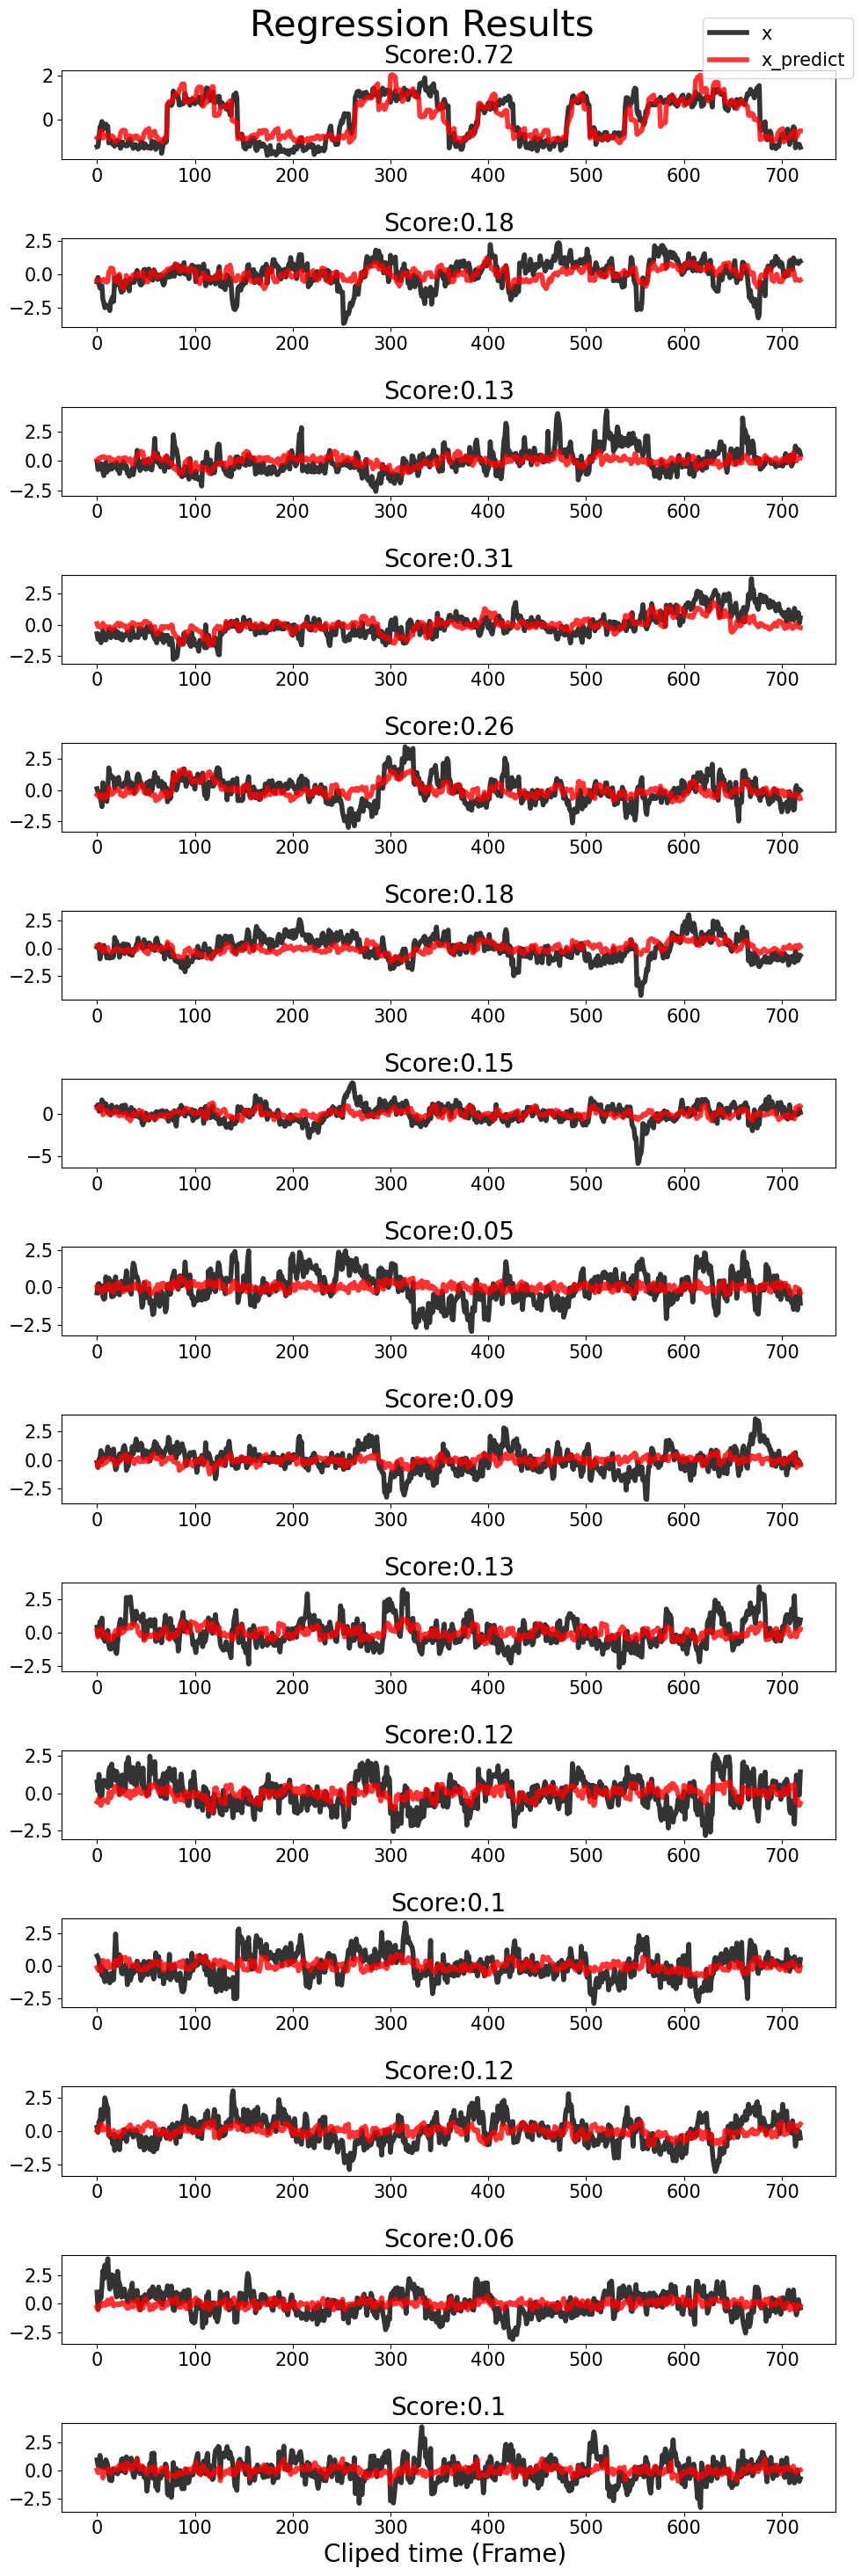

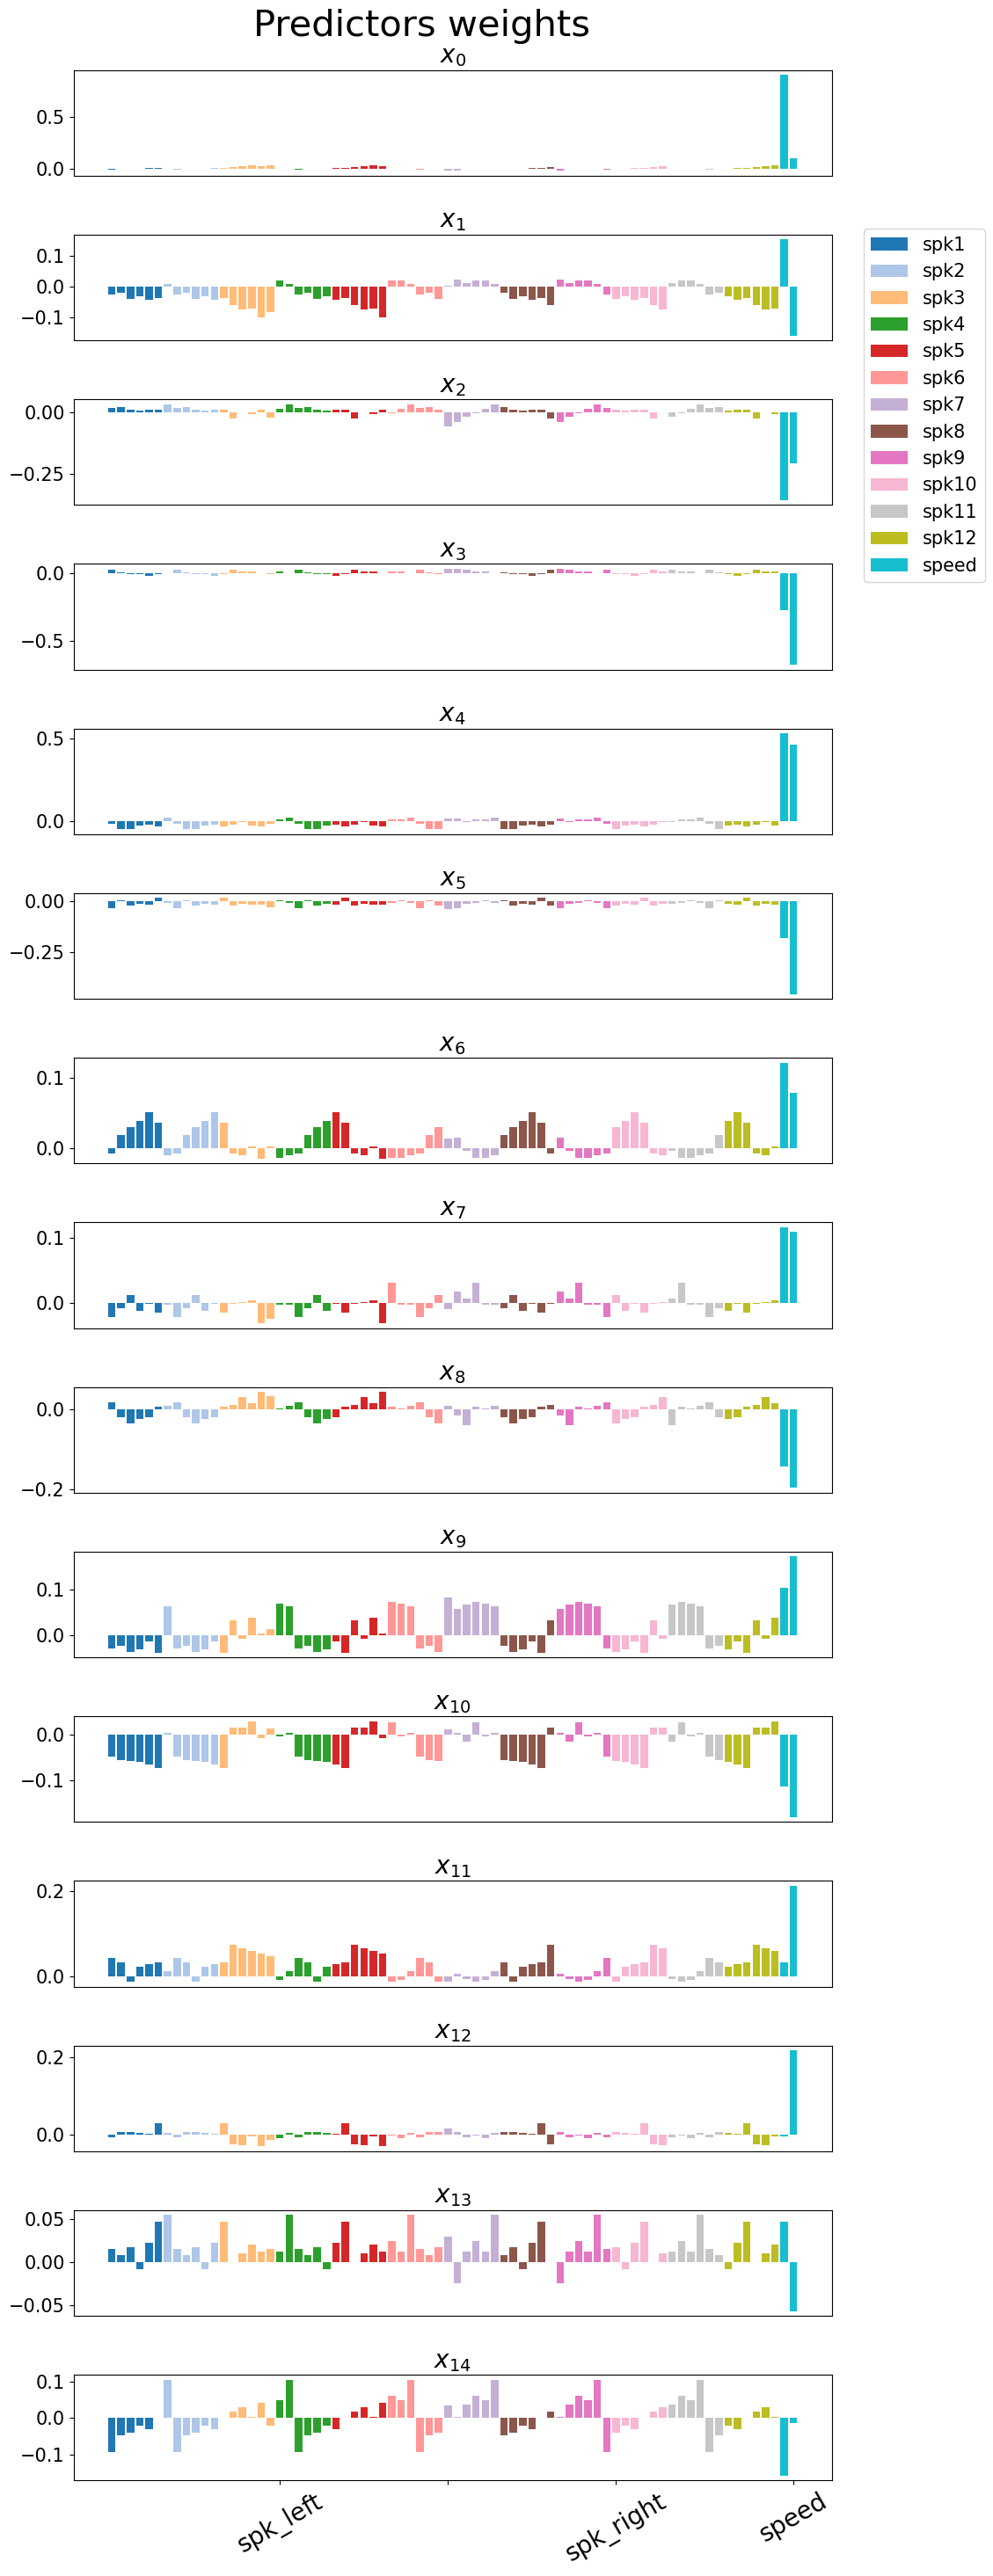

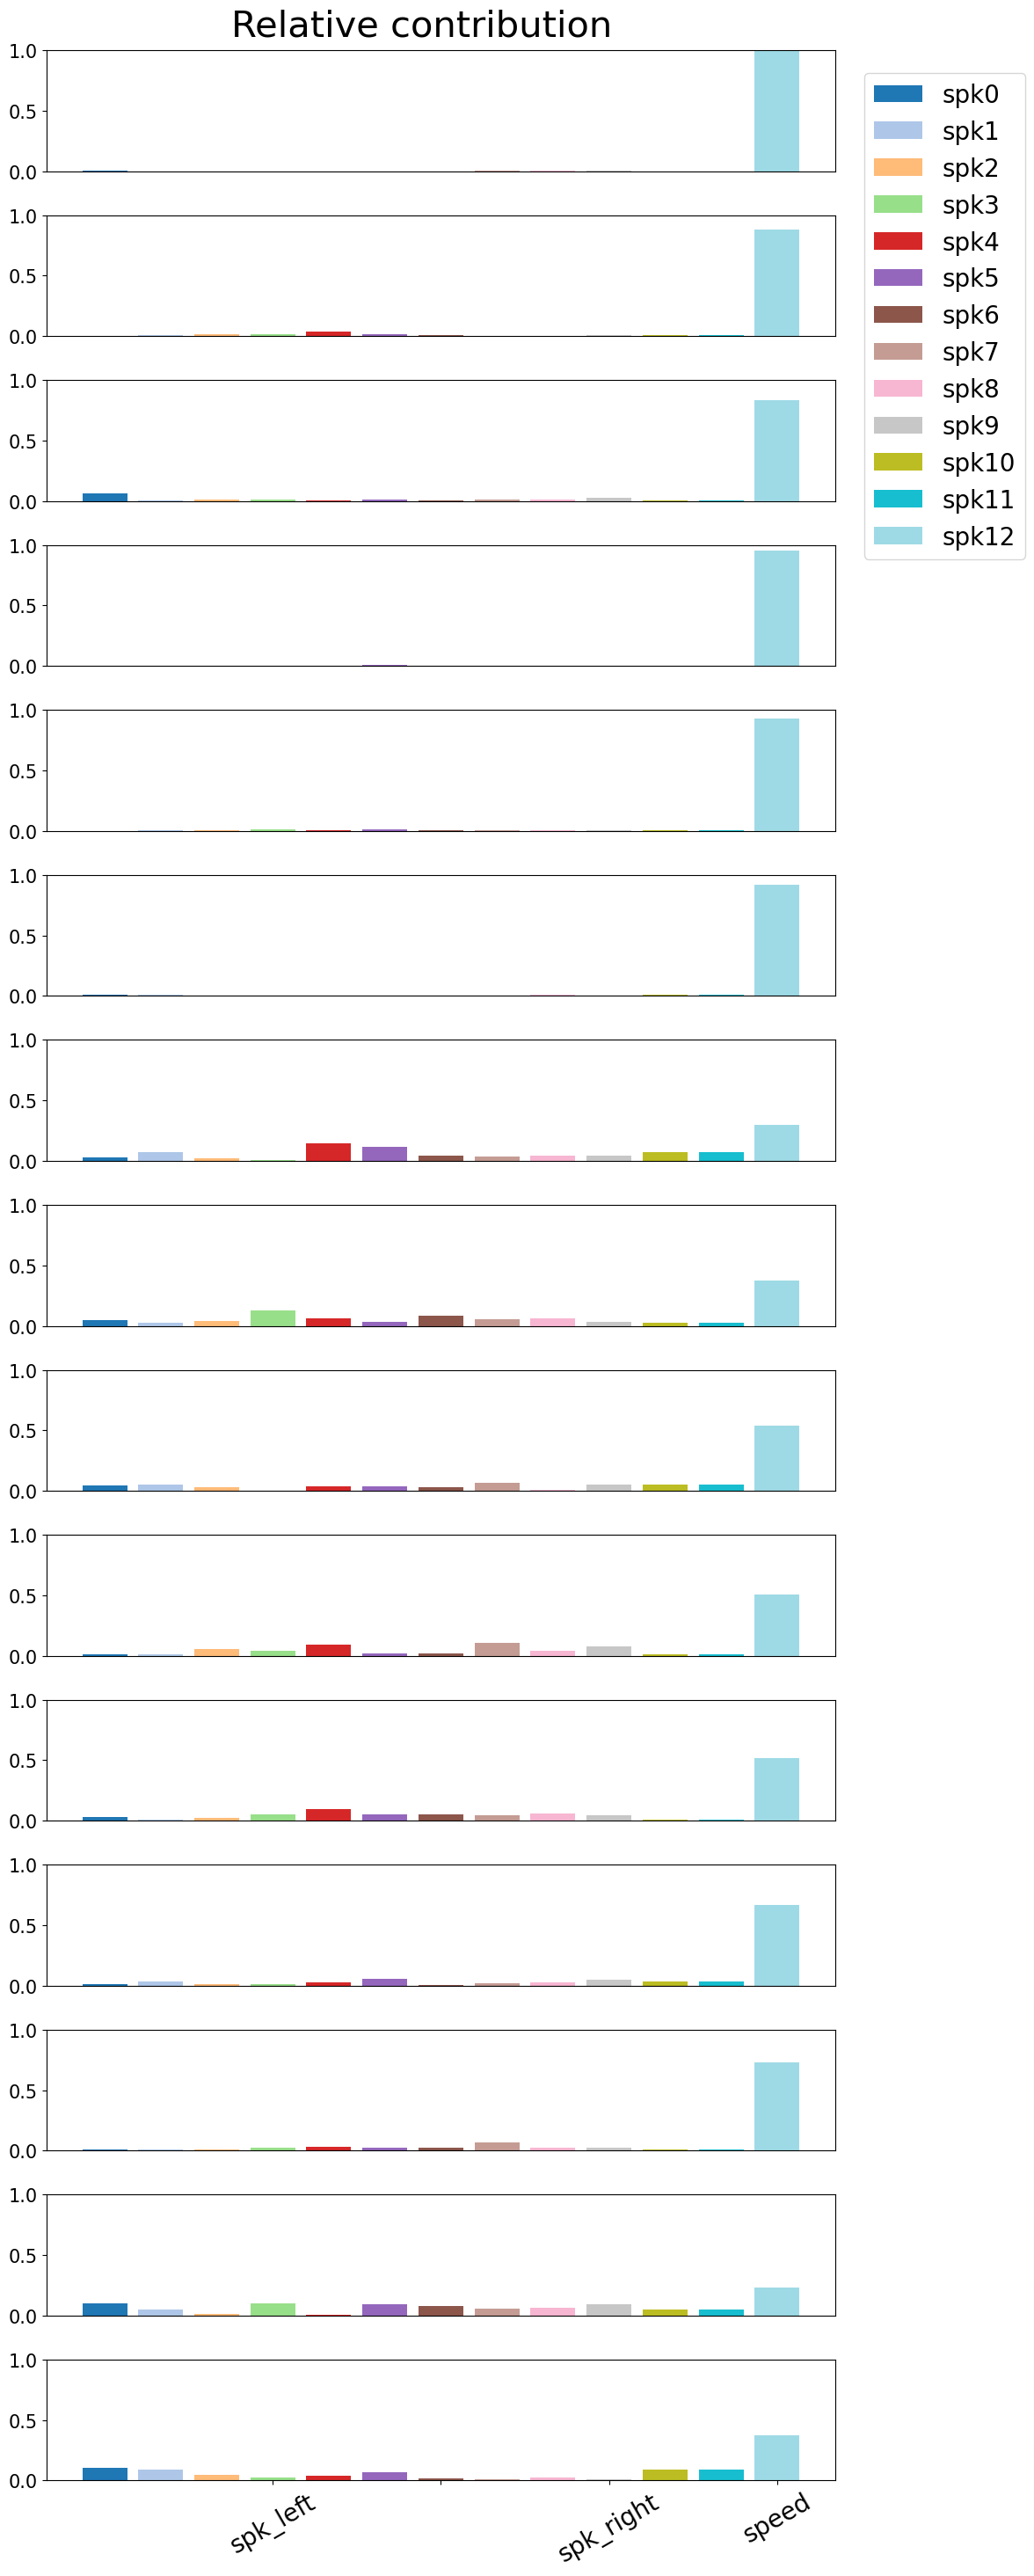

In [11]:
# plot y_fit 

savepath = './figs/encoder/si_encoder'

figsize = (10, 30)
# regression traces 
plt_yfit(x_clips_scale, y_fit, scores,plot_type ='full', figsize = figsize, savepath = savepath)
# regression weights
barplot_weights(ws_cat, name = 'Predictors_weights', 
                plot_type = 'full', figsize = figsize,
                include_legend=False, 
                legend_fontsize = font_ssmall, 
                ax_title_fontsize= font_small,
                xlabel_fontsize= font_small,
                savepath = savepath)



barplot_score_cat(relative_contribution_scores, savepath = savepath, figsize = figsize,
                name = 'Relative_contribution', plot_type ='full', ylim =[0,1])



# plot main results

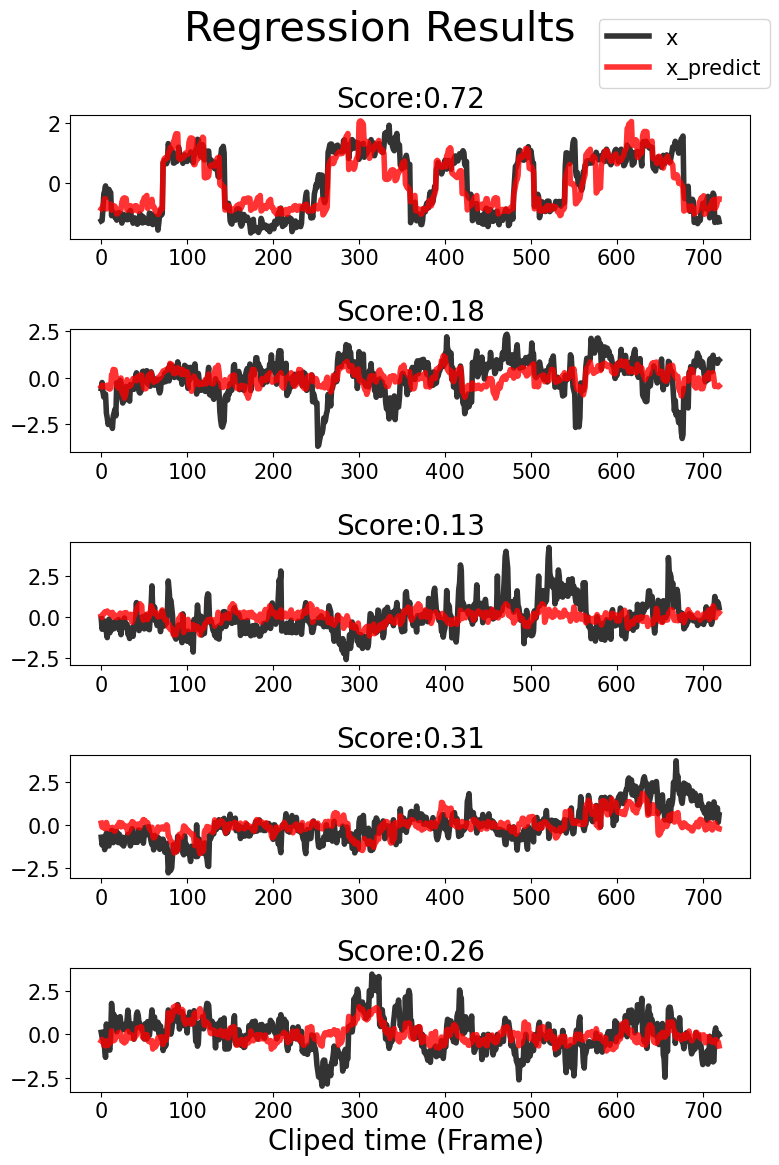

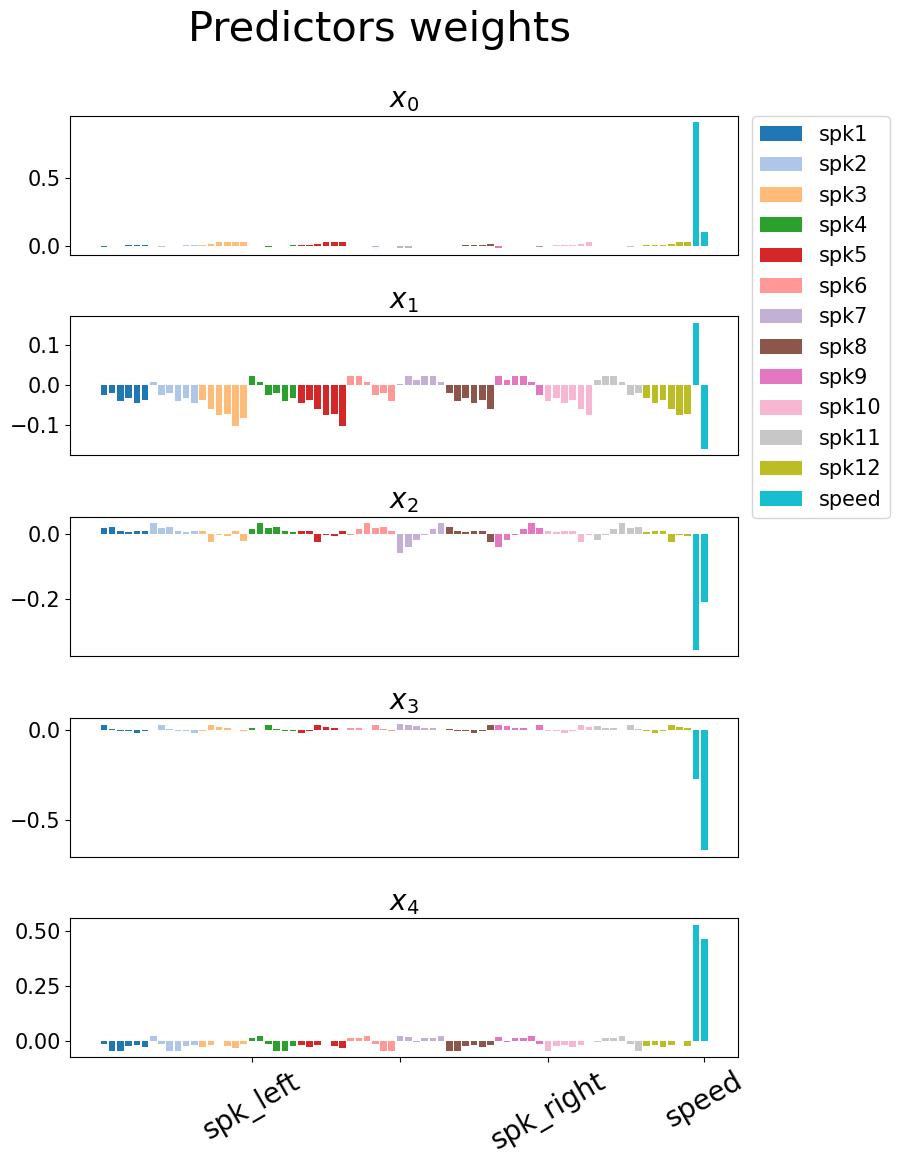

In [12]:
savepath = './figs/encoder/'
plt_yfit(x_clips_scale, y_fit, scores, plot_type ='example', savepath = savepath, 
        figsize = (8, 12))
barplot_weights(ws_cat, name = 'Predictors_weights',
                ax_title_fontsize= font_small,
                legend_fontsize = font_ssmall, 
                xlabel_fontsize= font_small,
                savepath = savepath, 
                figsize = (8, 12),
                plot_type = 'example')



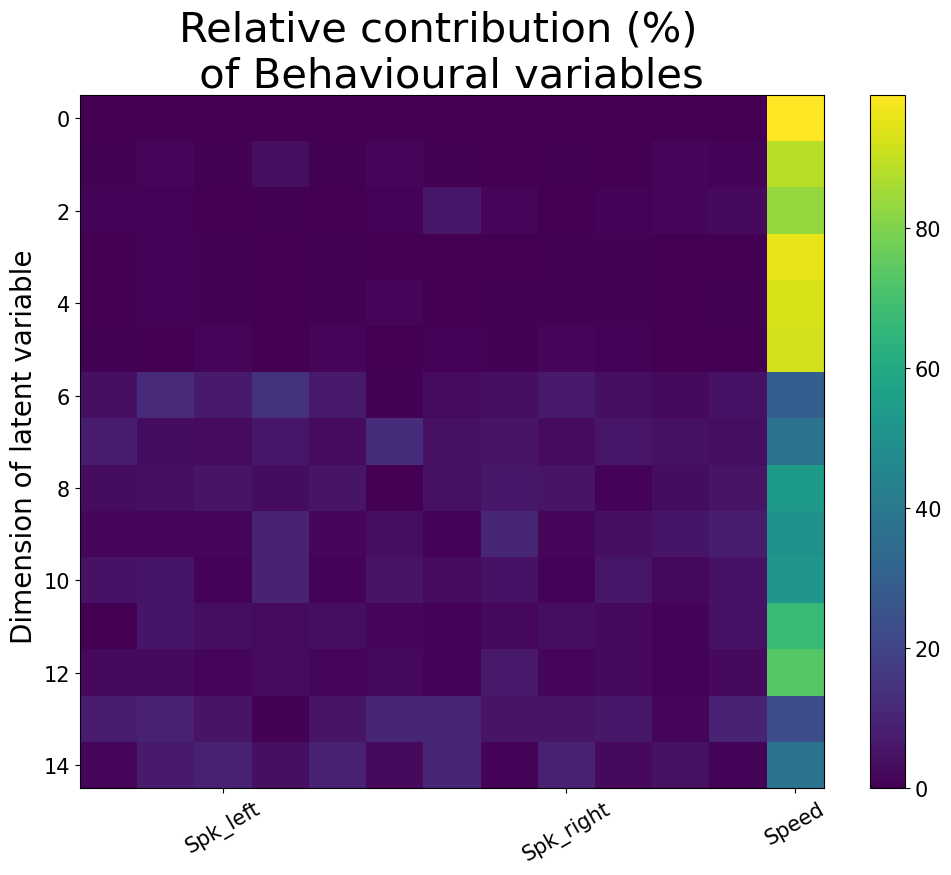

In [40]:
import os
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
im =ax.imshow(relative_contribution_scores_cat*100, aspect='auto',  cmap = 'viridis', vmin = 0, vmax =99)

fig.colorbar(im)
ax.set_xticks([2,8,12])
xticklabels =['Spk_left','Spk_right','Speed']

ax.set_xticklabels(xticklabels, rotation = 30)
ax.set_title('Relative contribution (%)  \n of Behavioural variables ')
ax.set_ylabel('Dimension of latent variable ')
figname ='imshow_relative_contribution.pdf'
savepath ='./figs/encoder'
figfile = os.path.join(savepath, figname)
fig.savefig(figfile, bbox_inches = 'tight')
plt.show()


0.9933476082971663

[18.0, 36.0, 54.0, 73]


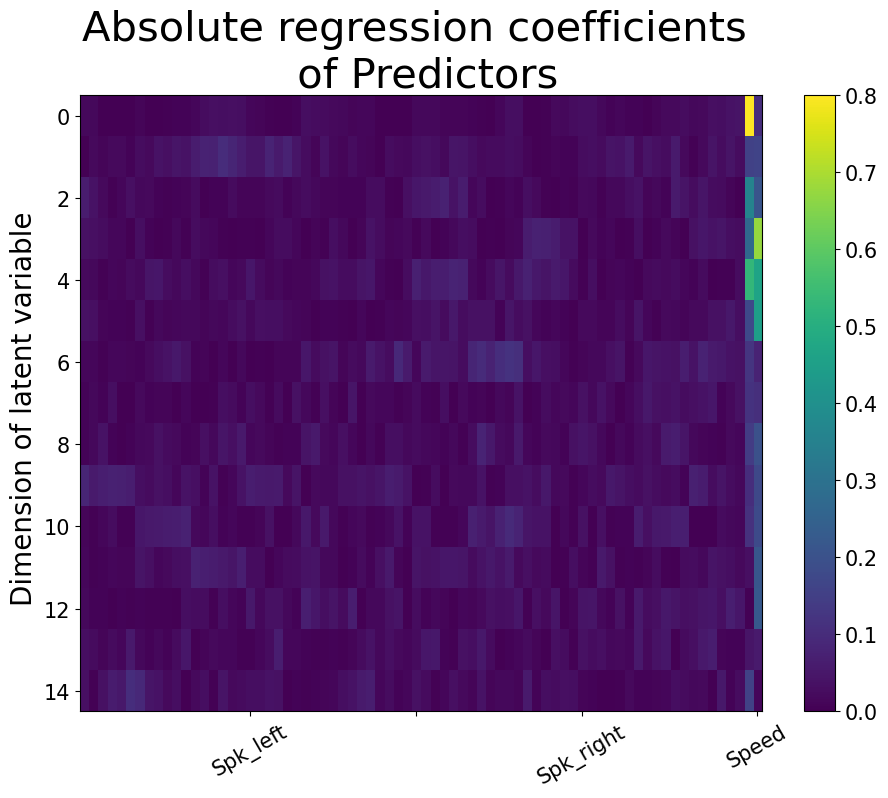

In [200]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
im =ax.imshow(np.abs(ws), aspect='auto',  cmap = 'viridis', vmin = 0, vmax = 0.8)

fig.colorbar(im)
# ax.set_xticks([2,8,12])
n_spks = 12
n_speed = 2
n = n_spks + n_speed
M = (ws.shape[1]-n_speed)/n_spks

xticks = [n_spks*M*0.25,n_spks*M*0.5, n_spks*M*0.75, ws.shape[1]-1 ]
xticklabels =['Spk_left','','Spk_right','Speed']
print(xticks)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation = 30)
ax.set_title('Absolute regression coefficients \n of Predictors')
ax.set_ylabel('Dimension of latent variable ')

figfile ='figs/encoder/imshow_absw.pdf'
fig.savefig(figfile,bbox_inches='tight')
plt.show()

In [15]:
from scipy.io import loadmat

data = loadmat('./data/piezo_data1.mat')
spk_on = data['all_spk_scan']
speed = data['all_speed_scan']
move = data['all_move_scan']
import utility; reload(utility)
from utility import lowpass_filter
speed_filter = lowpass_filter(speed, cutoff=0.1, fs=3.86, order=2)
move_filter = lowpass_filter(move, cutoff=0.1, fs=3.86, order=2)

model_name = 'mbpca_individual'
data_type ='data1'
depth =0
filepath = os.path.join('./results_/results_update_order_xw/',data_type,model_name)
filename =  model_name + '_'+data_type+'_depth'+str(depth)+'.pickle'
savefile = os.path.join(filepath,filename)
with open(savefile,'rb' ) as f:
    model = pickle.load(f)
nef =int(model.scores['nef'])
print(nef)
X = model.X
X_d = X[0:nef,:]

# correlation with speed
from scipy import stats
n_speed, T = speed_filter.shape
correlation_speed = np.zeros((nef, n_speed))
for i in range(nef):
    xi = X[i,:]
    for j in range(n_speed):
        correlation_speed[i,j],_ = stats.pearsonr(speed_filter[j,:],xi)

correlation_speed_eu = np.zeros(nef)
speed_filter_eu = np.linalg.norm(speed_filter,axis = 0)
for i in range(nef):
    xi = X[i,:]
    
    correlation_speed_eu[i],_ = stats.pearsonr(speed_filter_eu,xi)



15


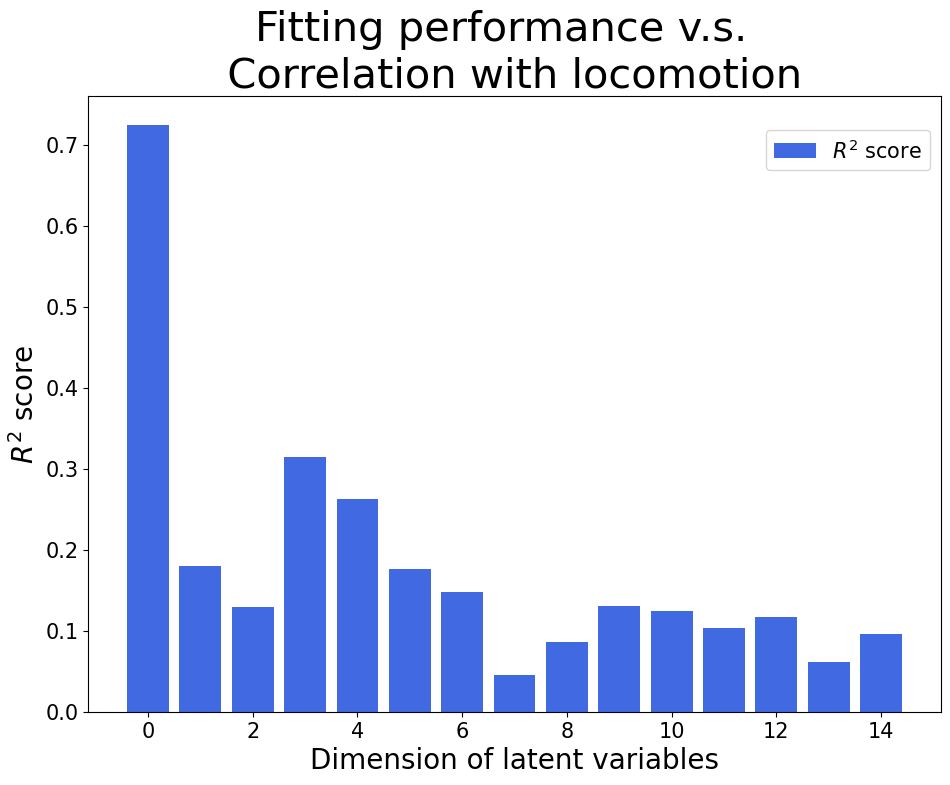

In [170]:
fig,ax = plt.subplots( )
fig.set_size_inches(11, 8)
ax.bar(np.arange(0, len(scores)), scores, color ='royalblue', label =r'$R^2$ score')
ax.set_xlabel('Dimension of latent variables')
ax.set_ylabel(r'$R^2$ score')
ax.set_title('Fitting performance v.s.  \n Correlation with locomotion ')

figname = 'fitting_score.pdf'
savefig = os.path.join(savepath, figname)
fig.savefig(savefig)
fig.legend(bbox_to_anchor=(0.9, 0.85, 0,0))
plt.show()


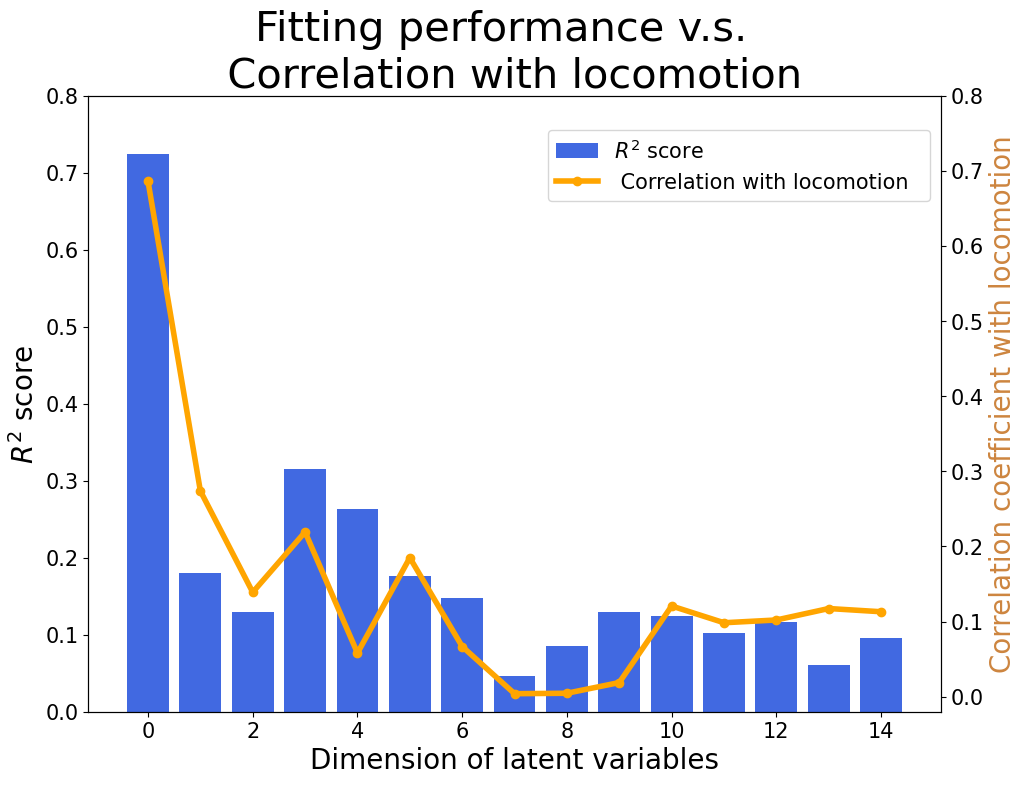

In [198]:
fig,ax = plt.subplots( )
fig.set_size_inches(11, 8)
ax1 = ax.twinx()
ax.bar(np.arange(0, len(scores)), scores, color ='royalblue', label =r'$R^2$ score')
ax.set_xlabel('Dimension of latent variables')
ax.set_ylabel(r'$R^2$ score')
ax.set_title('Fitting performance v.s.  \n Correlation with locomotion ')
ax1.plot(np.abs(correlation_speed_eu),'o-', color ='orange', label =' Correlation with locomotion  ')
# ax1.plot(correlation_speed_eu, color ='orange', label ='Correlation coefficient ')
ax.set_ylim([0,0.8])
ax1.set_ylim([-0.02,0.8])
ax1.set_ylabel('Correlation coefficient with locomotion',color ='peru')


figname = 'fitting_score_cc.pdf'
savefig = os.path.join(savepath, figname)
fig.savefig(savefig, bbox_inches='tight')
fig.legend(bbox_to_anchor=(0.9, 0.85, 0,0))
plt.show()


In [41]:
relative_contribution_scores_cat.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
relative_contribution_scores_cat.shape

(15, 13)

In [53]:
relative_contribution_score_spk_left = relative_contribution_scores_cat[:,0:6].sum(axis = 1)
relative_contribution_score_spk_right = relative_contribution_scores_cat[:,6:12].sum(axis = 1)
relative_contribution_score_speed = relative_contribution_scores_cat[:,-1]

In [54]:
relative_contribution_scores_3cat = np.vstack((relative_contribution_score_spk_left,relative_contribution_score_spk_right, relative_contribution_score_speed))

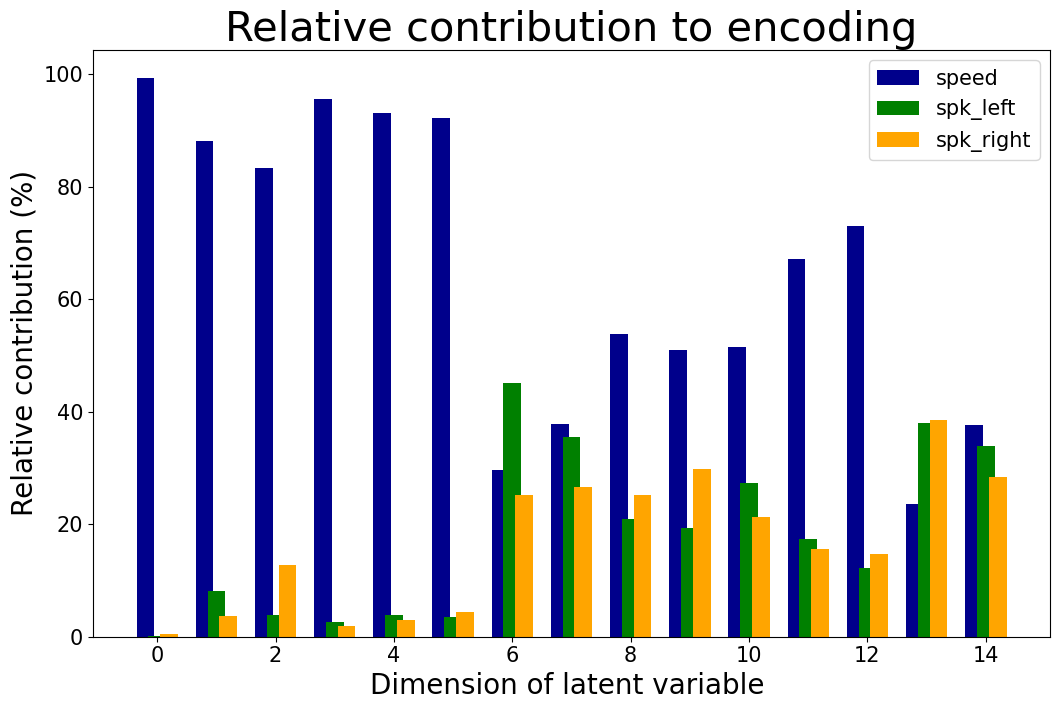

In [204]:
x_std = np.std(X_d, axis = 1)

fig, ax = plt.subplots()
fig.set_size_inches(11, 7.5)

xaxis = np.arange(len(relative_contribution_score_speed)) 
ax.bar(xaxis - 0.2,relative_contribution_score_speed*100,color = 'darkblue',width = 0.3, label = 'speed')
ax.bar(xaxis,relative_contribution_score_spk_left*100,color = 'g',width = 0.3, label = 'spk_left')
ax.bar(xaxis + 0.2, relative_contribution_score_spk_right*100,color = 'orange',width = 0.3, label ='spk_right')
ax.set_xticks(np.arange(0,15,2))
ax.set_ylabel('Relative contribution (%)')
ax.set_title('Relative contribution to encoding')
ax.set_xlabel('Dimension of latent variable ')


plt.legend(loc = 'upper right')
plt.tight_layout()
figfile ='./figs/encoder/bar_relative_contribution.pdf'
fig.savefig(figfile, bbox_inches = 'tight')

plt.show()



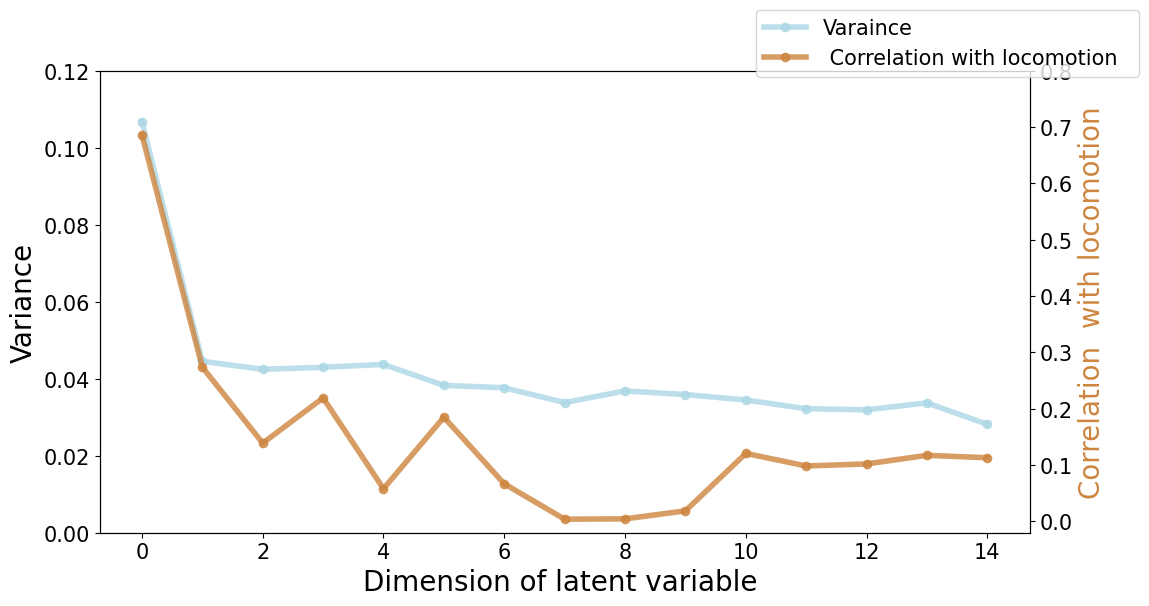

In [192]:
x_std = np.std(X_d, axis = 1)

fig,ax = plt.subplots(figsize = (12, 6))
ax1 = ax.twinx()
fig.set_size_inches(11, 5)
ax.plot()
ax.plot(x_std,'o-',color = 'lightblue',alpha = 0.8, label='Varaince') # variance stored in the signal 
ax.set_xticks(np.arange(0,15,2))
ax.set_xlabel('Dimension of latent variable ')
ax.set_ylabel('Variance')
ax.set_ylim([0.0,0.12])
ax1.plot(np.abs(correlation_speed_eu),'o-', color ='peru', alpha = 0.8,
         label =' Correlation with locomotion  ')
# ax1.plot(correlation_speed_eu, color ='orange', label ='Correlation coefficient ')
ax1.set_ylim([-0.02,0.8])
ax1.set_ylabel('Correlation  with locomotion',color ='peru')

fig.legend(loc = 'upper right')
# ax1.set_title('Varaince in latent factors')
figfile ='./figs/encoder/varaince.pdf'
# fig.savefig(figfile, bbox_inches = 'tight')
# plt.tight_layout()
plt.show()

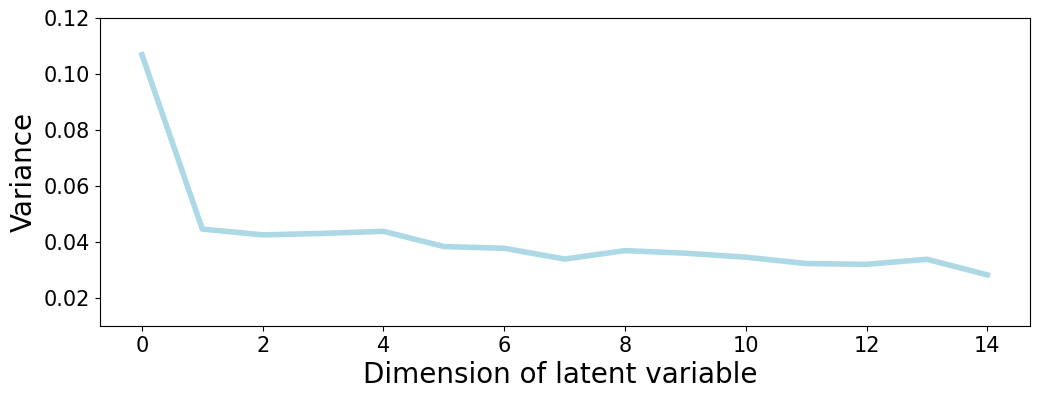

In [168]:
x_std = np.std(X_d, axis = 1)

fig,ax1 = plt.subplots()
fig.set_size_inches(12, 4)

ax1.plot(x_std,'lightblue') # variance stored in the signal 
ax1.set_xticks(np.arange(0,15,2))
ax1.set_xlabel('Dimension of latent variable ')
ax1.set_ylabel('Variance')
ax1.set_ylim([0.01,0.12])
# ax1.set_title('Varaince in latent factors')
figfile ='./figs/encoder/varaince.pdf'
fig.savefig(figfile, bbox_inches = 'tight')
plt.show()

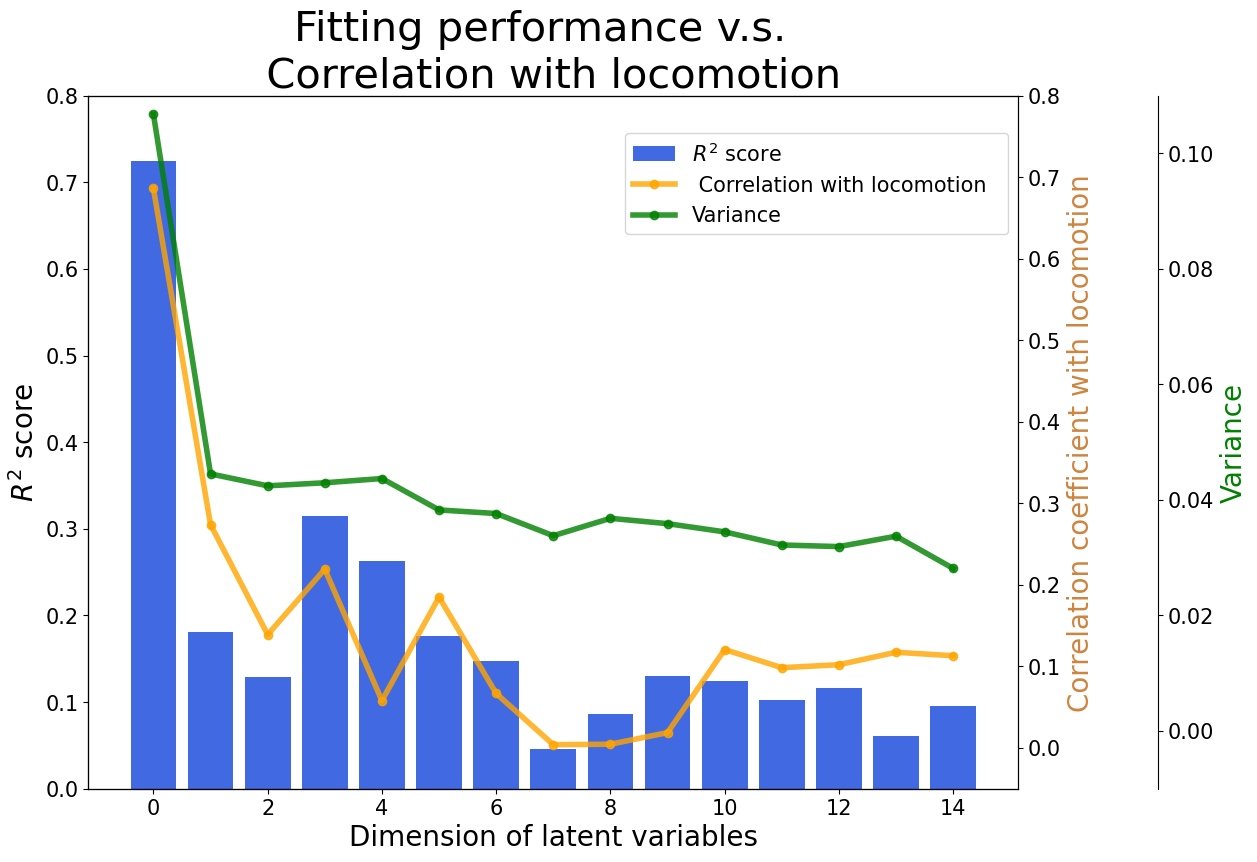

In [195]:
fig,ax = plt.subplots( )
fig.set_size_inches(12, 9)
ax1 = ax.twinx()
ax.bar(np.arange(0, len(scores)), scores, color ='royalblue', label =r'$R^2$ score')
ax.set_xlabel('Dimension of latent variables')
ax.set_ylabel(r'$R^2$ score')
ax.set_title('Fitting performance v.s.  \n Correlation with locomotion ')
ax1.plot(np.abs(correlation_speed_eu),'o-', color ='orange',alpha = 0.8, label =' Correlation with locomotion  ')
# ax1.plot(correlation_speed_eu, color ='orange', label ='Correlation coefficient ')
ax.set_ylim([0,0.8])
ax1.set_ylim([-0.05,0.8])
ax1.set_ylabel('Correlation coefficient with locomotion',color ='peru')


ax2 = ax.twinx()
ax2.plot(x_std,'go-',label='Variance', alpha = 0.8)
ax2.spines["right"].set_position(("axes", 1.15))
ax2.set_ylim([-0.01, 0.11])
ax2.set_ylabel('Variance', color ='g')
figname = 'fitting_score_cc_var.pdf'
savefig = os.path.join(savepath, figname)
fig.savefig(savefig, bbox_inches='tight')
fig.legend(bbox_to_anchor=(0.9, 0.85, 0,0))
plt.show()
